<h1><b>Iris Flower Classification by Richard Muchoki</b></h1>
<p style="font-size:16px;">
    In this Jupyter Notebook, I'm going to explore the Iris Flower Dataset consisting of 3 species: `setosa`,`versicolor`, and `virginica` distinguished based on their measurements. For this project I'm going to use Logistic Regresseion Machine Learning Model that can learn from
these sepal and petal measurements and accurately classify the Iris flowers into their respective species.
</p>
<h3><b>Columns Description:</b></h3>
<ol style="font-size:16px;">
    <li>Petal Length - Length measured in centimeters(cm)</li><br>
    <li>Petal Width - Length measured in centimeters(cm)</li><br>
    <li>Sepal Length - Length measured in centimeters(cm)</li><br>
    <li>Sepal Width - Length measured in centimeters(cm)</li><br>
    <li>Class(Species) - Contains 3 Unique Values: (0)Iris-setosa, (1)Iris-versicolor, (2)Iris-virginica </li>
</ol>

<h1><b>1. Data Collection and Loading</b></h1>

In [4]:
# Import Necessary Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for Logistic Regression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

<h3><b>Warning Supressions</b></h3>

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the Iris Dataset
iris = pd.read_csv(r"C:\Users\Richard Muchoki\Documents\CodSoft Projects\CODSOFT\Iris Flower Classification\Dataset\IRIS.csv")

# Make a copy of the dataset
iris_data = iris.copy()

In [8]:
# Let's Diplay the First 5 Rows of the Dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Let's display the number of rows and columns our dataset has; 
# 150 rows and 5 columns
iris_data.shape

(150, 5)

In [10]:
# Display the DataFrame information including the data types present
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Let's Display the data types coherently
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [28]:
# Let's check the Memory Usage of each column in bytes
iris_data.memory_usage()

Index            132
sepal_length    1200
sepal_width     1200
petal_length    1200
petal_width     1200
species         1200
dtype: int64

In [30]:
# Let's Check for Missing Values in our Dataset
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<h1><b>2. Data Exploration</b></h1>

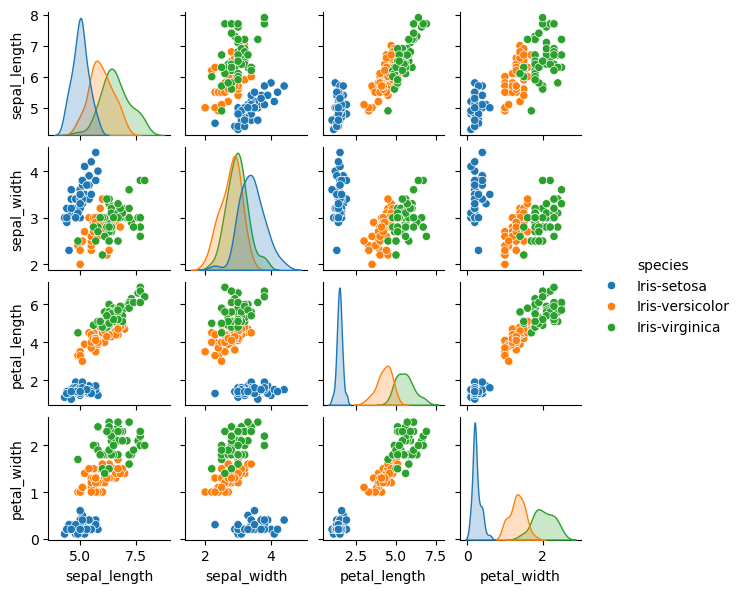

In [33]:
# Let's Use Seaborn Library To Visualize the Data
sns.pairplot(iris_data, hue='species', size=1.5)
plt.show()

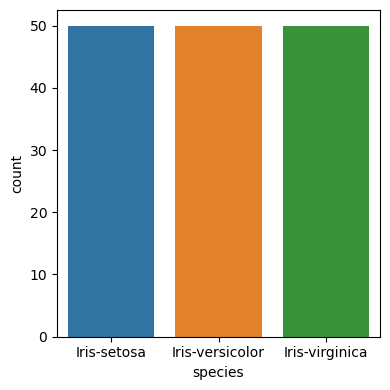

In [34]:
# Let's Display the 'Species' Column in our Dataset.

iris_column = ["species"]
fig=plt.subplots(1, figsize=(4,4))

# Use for loop to iterate through the elements in 'species' column in our dataset
for col in iris_column:
    sns.countplot(x=col, hue="species", data=iris_data)

plt.tight_layout()
plt.show()

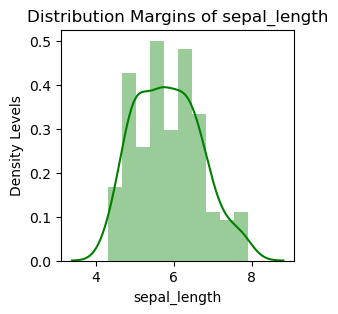

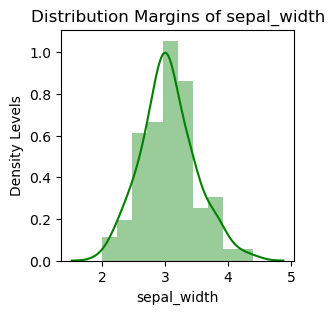

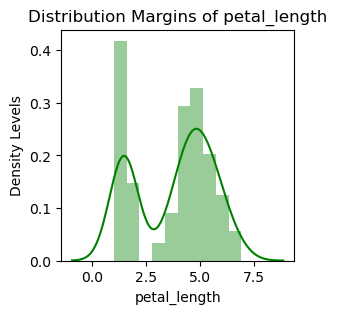

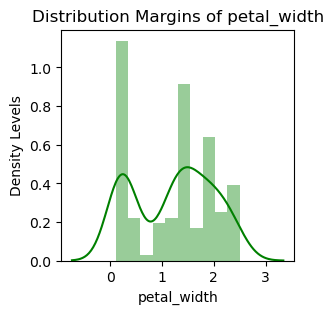

In [35]:
# Let's Display the Density of the Features in the Datasets

# Define
iris_data_features = ["sepal_length","sepal_width","petal_length","petal_width"]

# Use for loop to iterate through their column elements
for col in iris_data_features:
    plt.figure(figsize=(3,3))
    sns.distplot(iris_data[col], bins=10, color="green")
    plt.title(f"Distribution Margins of {col}")
    plt.xlabel(col)
    plt.ylabel("Density Levels")
    plt.show

<h1><b>3. Data Preprocessing</b></h1>
<p style="font-size:16px;">
    Since the `species` column is in text format we convert it into numerical format through encoding technique on categorical data
</p>

In [89]:
iris_data["species"] = iris_data["species"].astype("category").cat.codes
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [92]:
# Let's check the correlation of the data
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


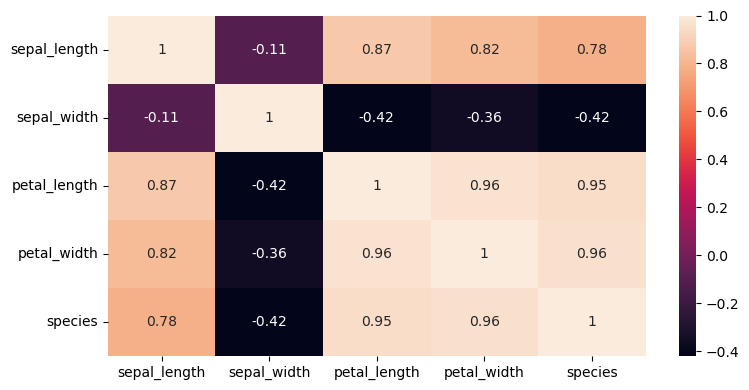

In [100]:
# Let's visualize the correlations
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True)

plt.tight_layout()
plt.show()

In [104]:
iris_data.shape

(150, 5)

<h1><b>4. Feature Engineering</b></h1>

In [109]:
# Let's prepare the independent and dependent variables
x = iris_data.drop(columns=['species'])
y = iris_data['species']

In [111]:
# Let's now standardise the features
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [113]:
# Let's Transform y features into 2D Arrays
y=y.values.reshape(-1,1)

<h3><b>Splitting Datasets into Training and Testing Features</b></h3>

In [116]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

<h1><b>5. Model Building and Training </b></h1>

In [119]:
# Logistic Regression Model
lg = LogisticRegression(random_state=0, penalty="l2", max_iter=1000, solver="lbfgs", tol=6e-3)

# Fitting the model with Training Data and Training it
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0, tol=0.006)

In [135]:
# Let's check the accuracy of how the model works on the training data.
lg.score(X_train,y_train)

0.9666666666666667

In [136]:
# Let's check the accuracy of how the model makes predictions.
y_pred=lg.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


In [165]:
# Let's make predictions
pred = lg.predict(X_test)
print(pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


<h1><b>6. Model Evaluation</b></h1>

In [141]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

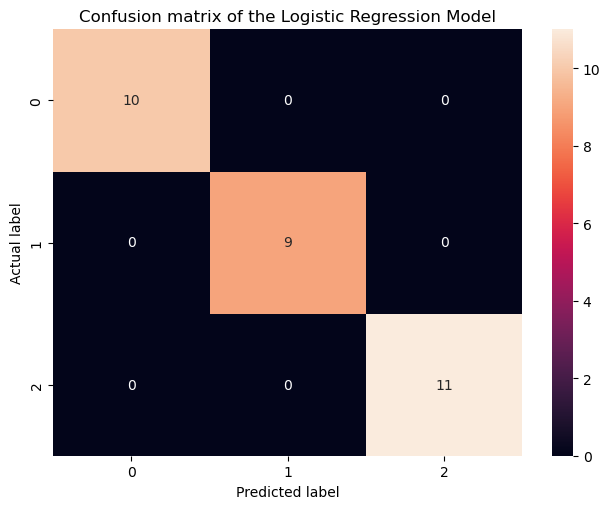

In [143]:
# Let's plot the confusion matrix using seaborn and matplotlib libraries
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating the heatmap using seaborn
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, fmt='g')

#xaxis label is set on bottom using the following method
ax.xaxis.set_label_position("bottom") 

# Method to tighten the plotted figure using the following method
plt.tight_layout()

plt.title('Confusion matrix of the Logistic Regression Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [147]:
# Classification Report to check for precision, accuracy, and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h1><b>7. Conclusion</b></h1>
<p style="font-size:16px;">
  This Data Science project successfully employed logistic regression to correctly classify Iris flowers in their different species. By analyzing various features such as petal length, petal width, sepal width, and sepal length, the model achieved an impressive 100% accuracy in classifying Iris Flowers in the different species.   
</p>
<p style="font-size:16px;">
    <b>Key Takeaways:</b>
</p>
<ol style="font-size:16px;">
    <li>Logistic Regression Model: The logistic regression model proved effective in classifying Iris Flowers based on the given features.</li><br>
    <li>Evaluation Metrics: The model achieved an overall accuracy of 100%, demonstrating its ability to correctly classify Iris Flowers.</li><br>
    <li>Data Visualization: Seaborn and matplotlib were instrumental in understanding the distributions of features and their relationships.</li>
</ol>